In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cmath

# MgO

## Time and Delay time Data

In [88]:
# theory_df = pd.read_csv('../more_delay/MgO_moredelay.csv', header=None)
theory_df00 = pd.read_csv('./MgO/kx_0_ky_0/datafile.csv', header=None)
theory_df01 = pd.read_csv('./MgO/kx_0_ky_1/datafile.csv', header=None)
theory_df02 = pd.read_csv('./MgO/kx_0_ky_2/datafile.csv', header=None)
theory_df03 = pd.read_csv('./MgO/kx_0_ky_3/datafile.csv', header=None)
theory_df04 = pd.read_csv('./MgO//kx_0_ky_4/datafile.csv', header=None)
theory_df05 = pd.read_csv('./MgO/kx_0_ky_5/datafile.csv', header=None)
display(theory_df00.shape)
display(theory_df01.shape)
display(theory_df02.shape)
display(theory_df03.shape)
display(theory_df04.shape)
display(theory_df05.shape)
# display(theory_df20.shape)
# display(theory_df30.shape)
# display(theory_df40.shape)
# display(theory_df50.shape)
# display(theory_df11.shape)
# display(theory_df22.shape)
# display(theory_df33.shape)
# display(theory_df44.shape)
# display(theory_df55.shape)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

In [89]:
print(len(theory_df00.axes[0]))

301


In [90]:
def band_filter(x):
    ar = []
    for i in x:
        if i >= 0.3 and i <=0.5:
            ar.append(1)
        else:
            ar.append(0)
    return np.array(ar)

In [91]:
from numpy.fft import fft, fftfreq, ifft
def filter_data(time, data):
    filtered_data = []
    w0 = 2.35
    for j in range(data.shape[1]):
        signal = data[:,j]*np.exp(1j*w0*time)
        signal_fft = fft(signal)
        x_freq = fftfreq(len(time), d=1)
        filter_signal = signal_fft * band_filter(x_freq)
        filtered_data.append(ifft(filter_signal)*np.exp(-1j*w0*time))
    return np.transpose(np.array(filtered_data))

In [92]:
def convert_to_complex(df, i, j):
    return complex((df[j][i][:-2] + 'j').replace("*^","e"))

In [93]:
theory_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])), dtype=complex)
for i in range(len(theory_df00.axes[0])):
    theory_data[i][0] = theory_df00[0][i]
    for j in range(1, len(theory_df00.axes[1])):
        # theory_data[i][j] = (convert_to_complex(theory_df00, i, j))
        theory_data[i][j] = 0
        for index in range(0, 1):
            theory_data[i][j] += convert_to_complex(eval("theory_df0" + str(index)), i, j)
w0 = 2.35
e_data = 1j*w0*theory_data[:, 1:]
e_data = filter_data(theory_df00.iloc[:,0], e_data)
# e_data = filter_data(np.arange(-150, 151, 1), e_data)

In [11]:
# np.savetxt('E_filtered_data.csv', e_data, delimiter=',')

In [80]:
len(theory_df00.axes[0])

301

In [94]:
abs_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])-1))
arg_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])-1))
for i in range(len(theory_df00.axes[0])):
    for j in range(len(theory_df00.axes[1])-1):
        (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j]) 

In [83]:
def max_E_index(i):
    return max(range(len(abs_data[:,i])), key = abs_data[:,i].__getitem__)

## Intensity Data

In [84]:
# E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# print(max(range(len(E_data_delay)), key = E_data_delay.__getitem__))

summed_abs_data = np.zeros(len(theory_df00.axes[1])-1)
for i in range(len(theory_df00.axes[1])-1):
    summed_abs_data[i] = np.sum(abs_data[:,i])

print(max(range(len(summed_abs_data)), key = summed_abs_data.__getitem__))

3


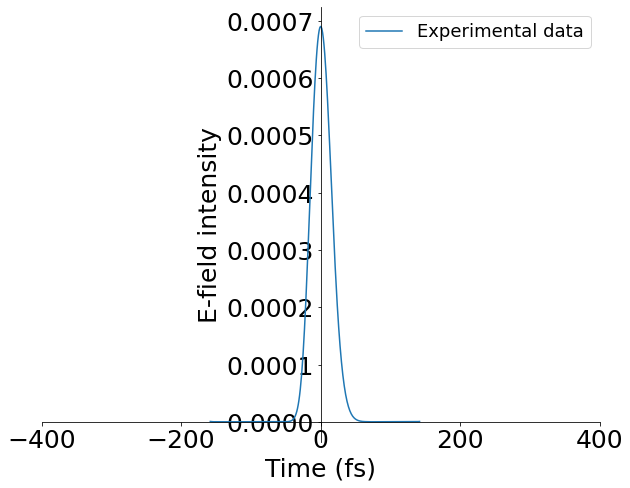

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


delay_index = 267 # Index where time_delay is near 0
theory_delay_index = 50
# correction_factor = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data[:,theory_delay_index])

# plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
plt.plot(theory_data[:,0].real - theory_data[:,0].real[max_E_index(theory_delay_index)], abs_data[:,theory_delay_index]) 
#Maxinmum value of E shifted to t=0
plt.legend(['Experimental data', 'Numerical calculation'],fontsize=18)
plt.xlabel("Time (fs)", fontsize=25)
plt.ylabel("E-field intensity", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# ax.set_yticks([0, 1.4*(10**6)])
plt.xlim([-400,400])
plt.show()

In [ ]:
# # print(np.arange(-150,150, 1)[100:701])
# summed_E_data_10 = np.zeros(len(theory_df.axes[1])-1)
# for i in range(len(theory_df.axes[1])-1):
#     summed_E_data_10[i] = np.sum(abs_data[100:701,i])

# # print(max(range(len(summed_E_data)), key = summed_E_data.__getitem__))
# # print(summed_E_data[19])
# # print(np.arange(210,-200,-10)[19])
# # print(summed_E_data[20])

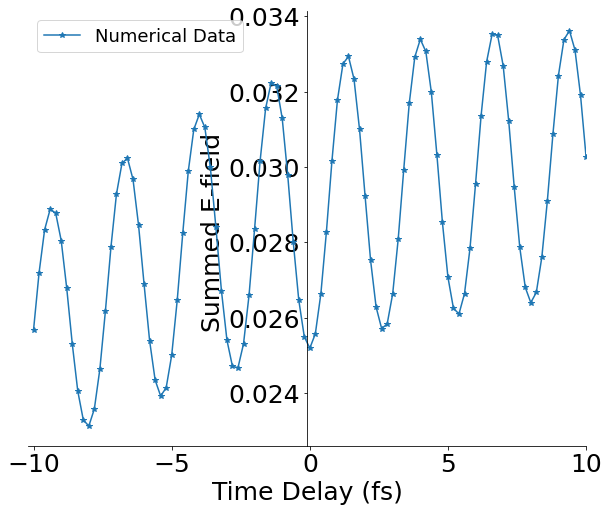

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
# E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

# plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs_data,"-*")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Numerical Data'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

## Phase Data

### Curve fitting of Phase Data

In [68]:
def phase_fun(t, phi_0, a, b, c, d):
    return phi_0 + a*t + b*(t)**2 + c*(t)**3 + d*(t)**4
# def phase_fun(t, phi_0, t0, b, c, d):
#     return phi_0 + b*(t-t0)**2 + c*(t-t0)**3 + d*(t-t0)**4

[ 4.91464380e-03 -2.17505272e-02  2.53115974e-04  3.61023390e-06
 -5.79284196e-08]


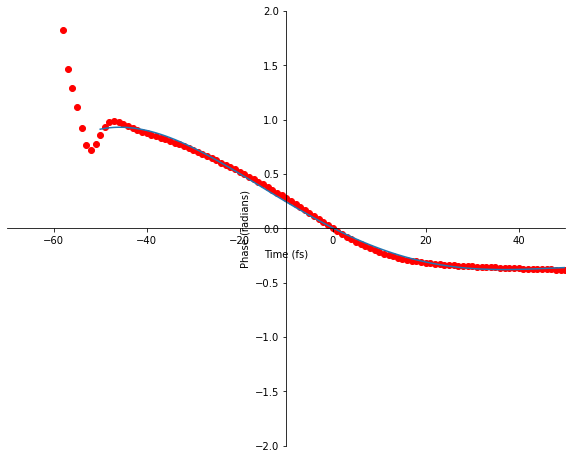

In [14]:
delay_index = 10
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,50])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

In [15]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    x1 = x[np.logical_and(x>=-50, x<=50)]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[np.logical_and(x>=-50, x<=50)]
    
    theory_param, theory_param_cov = curve_fit(phase_fun, x1, y1)
    theory_b_parameter[delay_index] = theory_param[2]
    theory_c_parameter[delay_index] = theory_param[3]

NameError: name 'theory_df' is not defined

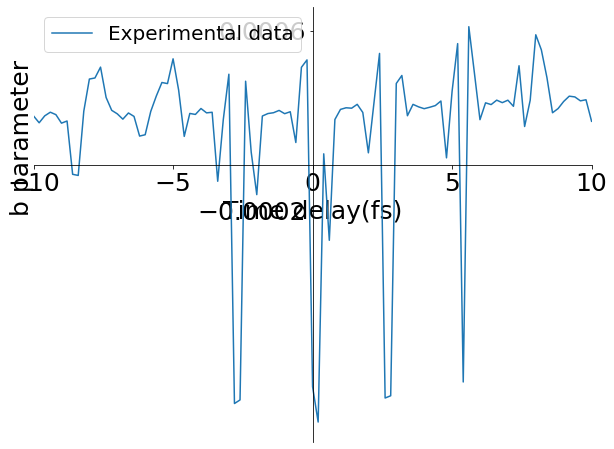

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, b_parameter, '-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_parameter,'-')
# plt.axhline(y=probe_param[2], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0006, 0.0006])
# plt.savefig("phase.png")
plt.show()

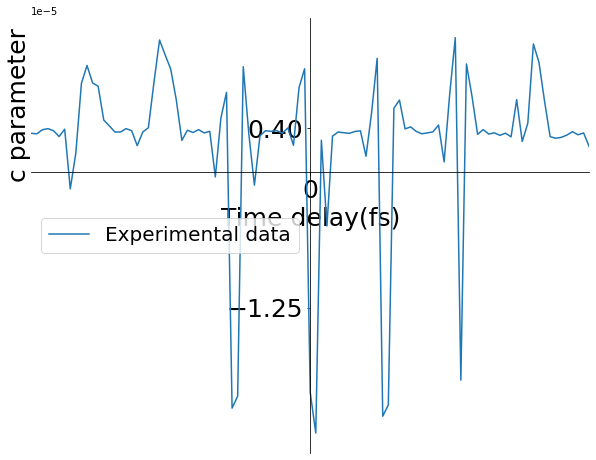

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, c_parameter,'-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_parameter, '-')
# plt.axhline(y=probe_param[3], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase.png")
plt.show()

## Least square fitting

In [69]:
import lmfit

In [70]:
def phase_fun(x, phi_0, a, b, c, d):
    return phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4

In [71]:
# model = lmfit.models.ExpressionModel("phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4")
model = lmfit.Model(phase_fun)

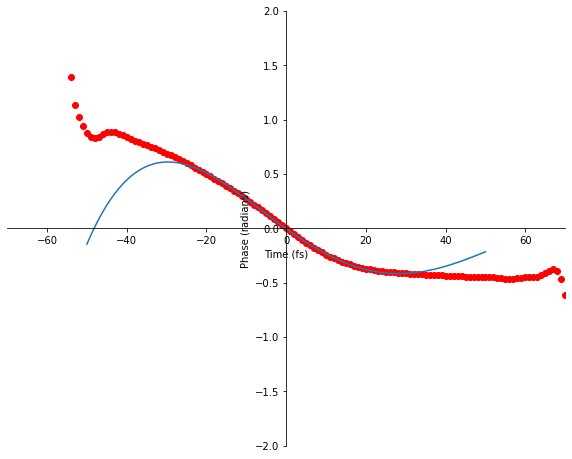

In [99]:
delay_index = 50
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


# theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
theory_E_delay = abs_data[:, delay_index]
param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
# theory_b_parameter[delay_index] = theory_param.best_values['b']
# theory_c_parameter[delay_index] = theory_param.best_values['c']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param.best_values['phi_0'], param.best_values['a'], param.best_values['b'], param.best_values['c'], param.best_values['d']) for t in x1])
# plt.plot(x1, param.eval(x=x1))
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,70])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

In [74]:
theory_b_parameter = np.zeros(len(theory_df00.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df00.axes[1])-1)
for delay_index in range(len(theory_df00.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    delaytime_range = np.logical_and(x>=-40, x<=50)
    x1 = x[delaytime_range]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[delaytime_range]
    
    theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
    theory_param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    theory_b_parameter[delay_index] = theory_param.best_values['b']
    theory_c_parameter[delay_index] = theory_param.best_values['c']

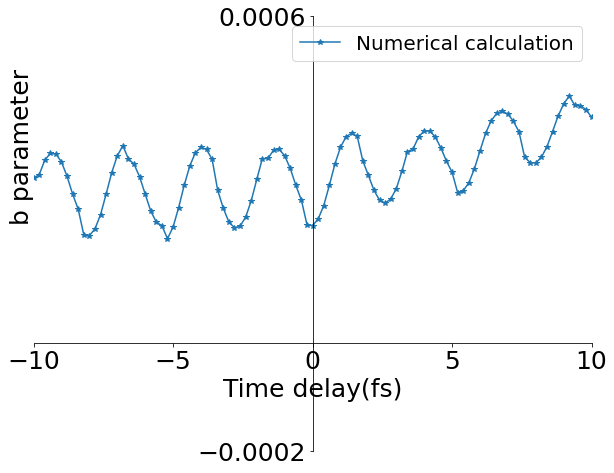

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, b_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_b_parameter, '-*')
# plt.axhline(y=probe_param.best_values['b'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0009, 0.0015])
# plt.savefig("phase.png")
plt.show()

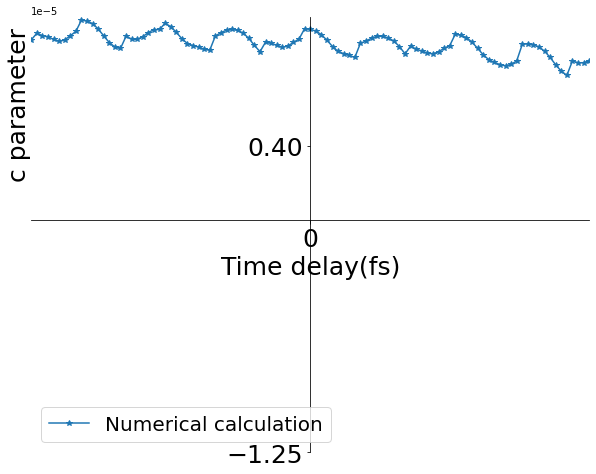

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, c_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_c_parameter, '-*')
# plt.axhline(y=probe_param.best_values['c'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase
#plt.ylim([-0.000025, 0.000015])
# plt.savefig("phase.png")
plt.show()

# ZnO

## Time and Delay time Data

In [100]:
# theory_df = pd.read_csv('../more_delay/MgO_moredelay.csv', header=None)
theory_df00 = pd.read_csv('./ZnO/kx_0_ky_0/datafile.csv', header=None)
theory_df01 = pd.read_csv('./ZnO/kx_0_ky_1/datafile.csv', header=None)
theory_df02 = pd.read_csv('./ZnO/kx_0_ky_2/datafile.csv', header=None)
theory_df03 = pd.read_csv('./ZnO/kx_0_ky_3/datafile.csv', header=None)
theory_df04 = pd.read_csv('./ZnO//kx_0_ky_4/datafile.csv', header=None)
theory_df05 = pd.read_csv('./ZnO/kx_0_ky_5/datafile.csv', header=None)
display(theory_df00.shape)
display(theory_df01.shape)
display(theory_df02.shape)
display(theory_df03.shape)
display(theory_df04.shape)
display(theory_df05.shape)
# display(theory_df20.shape)
# display(theory_df30.shape)
# display(theory_df40.shape)
# display(theory_df50.shape)
# display(theory_df11.shape)
# display(theory_df22.shape)
# display(theory_df33.shape)
# display(theory_df44.shape)
# display(theory_df55.shape)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 203)

In [101]:
print(len(theory_df00.axes[0]))

301


In [102]:
def band_filter(x):
    ar = []
    for i in x:
        if i >= 0.3 and i <=0.5:
            ar.append(1)
        else:
            ar.append(0)
    return np.array(ar)

In [103]:
from numpy.fft import fft, fftfreq, ifft
def filter_data(time, data):
    filtered_data = []
    w0 = 2.35
    for j in range(data.shape[1]):
        signal = data[:,j]*np.exp(1j*w0*time)
        signal_fft = fft(signal)
        x_freq = fftfreq(len(time), d=1)
        filter_signal = signal_fft * band_filter(x_freq)
        filtered_data.append(ifft(filter_signal)*np.exp(-1j*w0*time))
    return np.transpose(np.array(filtered_data))

In [104]:
def convert_to_complex(df, i, j):
    return complex((df[j][i][:-2] + 'j').replace("*^","e"))

In [105]:
theory_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])), dtype=complex)
for i in range(len(theory_df00.axes[0])):
    theory_data[i][0] = theory_df00[0][i]
    for j in range(1, len(theory_df00.axes[1])):
        # theory_data[i][j] = (convert_to_complex(theory_df00, i, j))
        theory_data[i][j] = 0
        for index in range(0, 1):
            theory_data[i][j] += convert_to_complex(eval("theory_df0" + str(index)), i, j)
w0 = 2.35
e_data = 1j*w0*theory_data[:, 1:]
e_data = filter_data(theory_df00.iloc[:,0], e_data)

In [ ]:
# np.savetxt('E_filtered_data.csv', e_data, delimiter=',')

In [106]:
abs_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])-1))
arg_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])-1))
for i in range(len(theory_df00.axes[0])):
    for j in range(len(theory_df00.axes[1])-1):
        (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j]) 

In [107]:
def max_E_index(i):
    return max(range(len(abs_data[:,i])), key = abs_data[:,i].__getitem__)

## Intensity Data

In [108]:
# E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# print(max(range(len(E_data_delay)), key = E_data_delay.__getitem__))

summed_abs_data = np.zeros(len(theory_df00.axes[1])-1)
for i in range(len(theory_df00.axes[1])-1):
    summed_abs_data[i] = np.sum(abs_data[:,i])

print(max(range(len(summed_abs_data)), key = summed_abs_data.__getitem__))

30


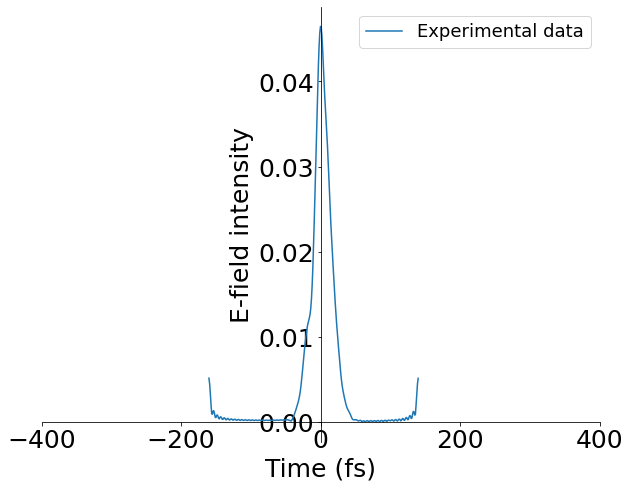

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


delay_index = 267 # Index where time_delay is near 0
theory_delay_index = 50
# correction_factor = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data[:,theory_delay_index])

# plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
plt.plot(theory_data[:,0].real - theory_data[:,0].real[max_E_index(theory_delay_index)], abs_data[:,theory_delay_index]) 
#Maxinmum value of E shifted to t=0
plt.legend(['Experimental data', 'Numerical calculation'],fontsize=18)
plt.xlabel("Time (fs)", fontsize=25)
plt.ylabel("E-field intensity", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# ax.set_yticks([0, 1.4*(10**6)])
plt.xlim([-400,400])
plt.show()

In [ ]:
# # print(np.arange(-150,150, 1)[100:701])
# summed_E_data_10 = np.zeros(len(theory_df.axes[1])-1)
# for i in range(len(theory_df.axes[1])-1):
#     summed_E_data_10[i] = np.sum(abs_data[100:701,i])

# # print(max(range(len(summed_E_data)), key = summed_E_data.__getitem__))
# # print(summed_E_data[19])
# # print(np.arange(210,-200,-10)[19])
# # print(summed_E_data[20])

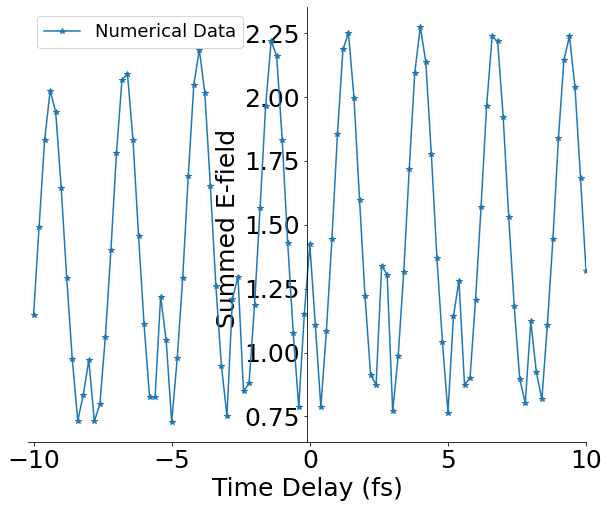

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
# E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

# plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs_data,"-*")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Numerical Data'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

## Phase Data

### Curve fitting of Phase Data

In [ ]:
def phase_fun(t, phi_0, a, b, c, d):
    return phi_0 + a*t + b*(t)**2 + c*(t)**3 + d*(t)**4
# def phase_fun(t, phi_0, t0, b, c, d):
#     return phi_0 + b*(t-t0)**2 + c*(t-t0)**3 + d*(t-t0)**4

[ 4.91464380e-03 -2.17505272e-02  2.53115974e-04  3.61023390e-06
 -5.79284196e-08]


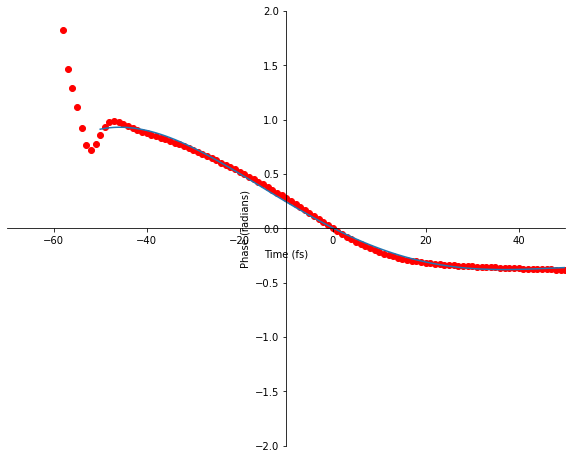

In [ ]:
delay_index = 10
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,50])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

In [ ]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    x1 = x[np.logical_and(x>=-50, x<=50)]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[np.logical_and(x>=-50, x<=50)]
    
    theory_param, theory_param_cov = curve_fit(phase_fun, x1, y1)
    theory_b_parameter[delay_index] = theory_param[2]
    theory_c_parameter[delay_index] = theory_param[3]

NameError: name 'theory_df' is not defined

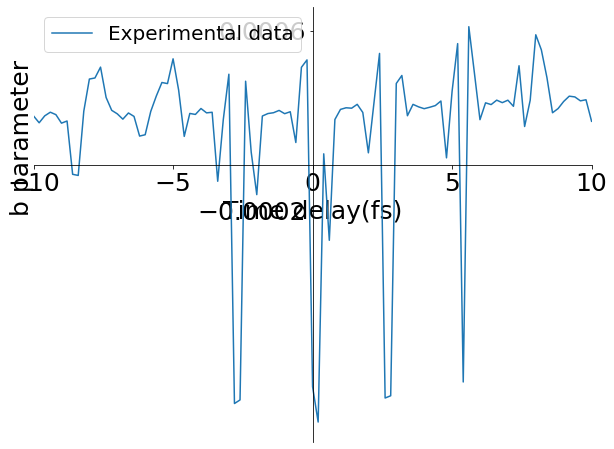

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, b_parameter, '-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_parameter,'-')
# plt.axhline(y=probe_param[2], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0006, 0.0006])
# plt.savefig("phase.png")
plt.show()

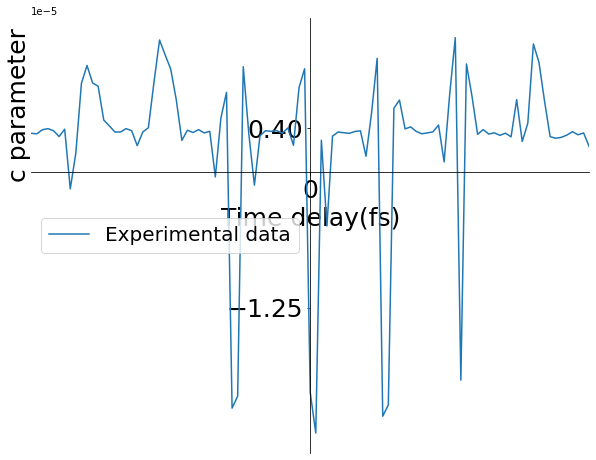

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, c_parameter,'-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_parameter, '-')
# plt.axhline(y=probe_param[3], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase.png")
plt.show()

## Least square fitting

In [38]:
import lmfit

In [39]:
def phase_fun(x, phi_0, a, b, c, d):
    return phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4

In [40]:
# model = lmfit.models.ExpressionModel("phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4")
model = lmfit.Model(phase_fun)

In [55]:
np.arange(10, -10.2, -0.2)[50]

3.552713678800501e-14

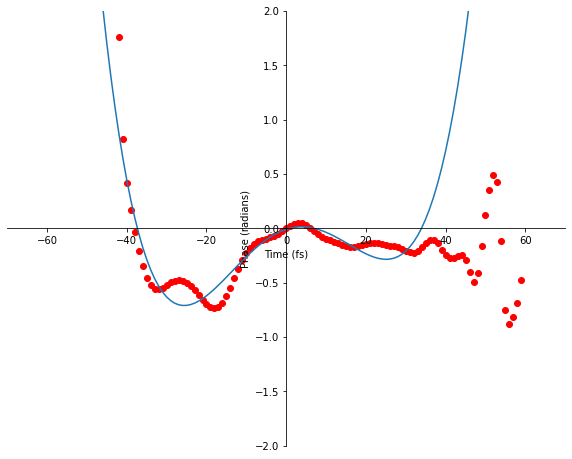

In [56]:
delay_index = 50
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
# theory_b_parameter[delay_index] = theory_param.best_values['b']
# theory_c_parameter[delay_index] = theory_param.best_values['c']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param.best_values['phi_0'], param.best_values['a'], param.best_values['b'], param.best_values['c'], param.best_values['d']) for t in x1])
# plt.plot(x1, param.eval(x=x1))
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,70])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

In [43]:
theory_b_parameter = np.zeros(len(theory_df00.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df00.axes[1])-1)
for delay_index in range(len(theory_df00.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    delaytime_range = np.logical_and(x>=-50, x<=50)
    x1 = x[delaytime_range]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[delaytime_range]
    
    theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
    theory_param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    theory_b_parameter[delay_index] = theory_param.best_values['b']
    theory_c_parameter[delay_index] = theory_param.best_values['c']

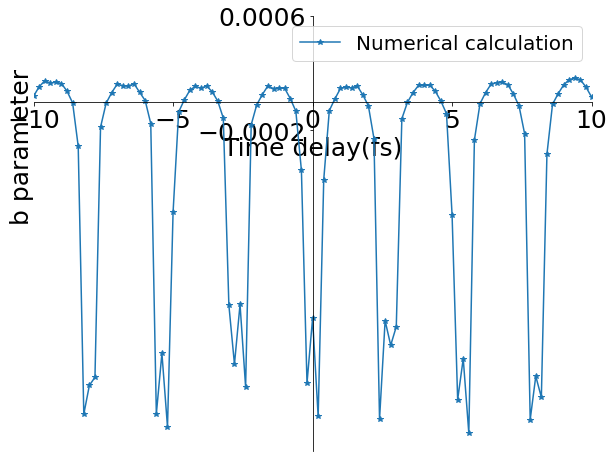

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, b_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_b_parameter, '-*')
# plt.axhline(y=probe_param.best_values['b'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0009, 0.0015])
# plt.savefig("phase.png")
plt.show()

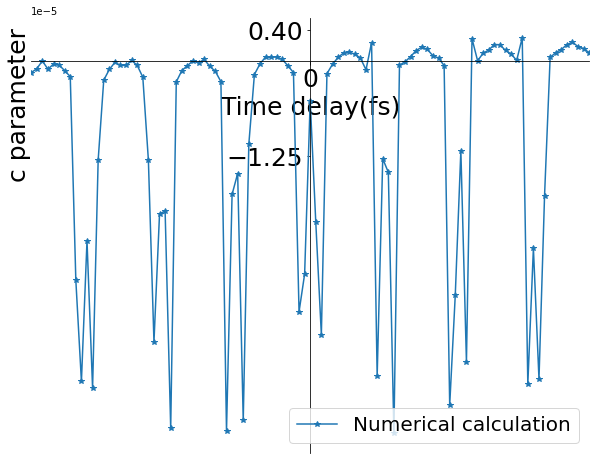

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plt.plot(delaytime_array, c_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_c_parameter, '-*')
# plt.axhline(y=probe_param.best_values['c'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase
#plt.ylim([-0.000025, 0.000015])
# plt.savefig("phase.png")
plt.show()

# Plot with style

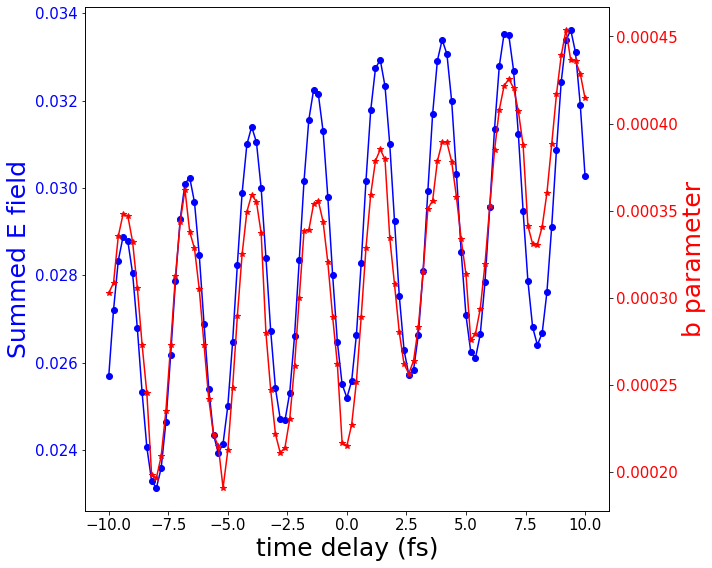

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_data, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('b parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, theory_b_parameter, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

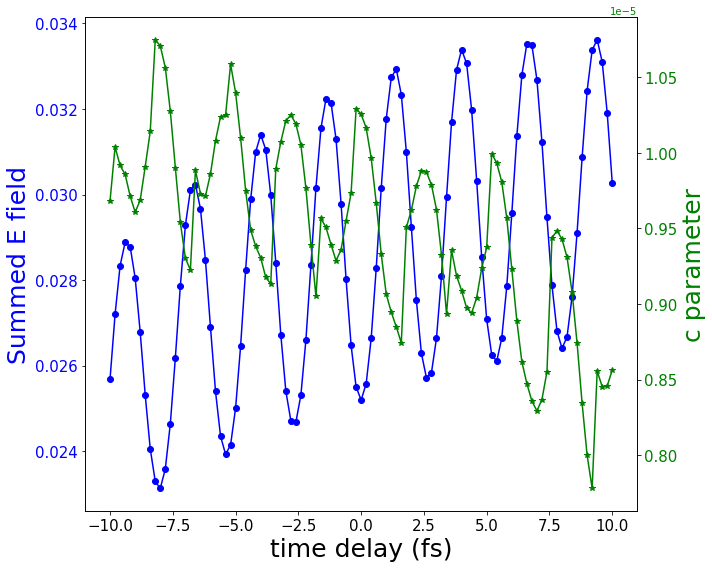

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_data, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'g'
ax2.set_ylabel('c parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, theory_c_parameter, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plot Everything Together

In [1]:
from data_analysis import *

In [2]:
_, _, _, summed_abs_MgO = extract_data('MgO', [0])
_, _, _, summed_abs_ZnO = extract_data('ZnO', [0])

MgO_b_param, MgO_c_param = time_delay_phase_data('MgO', [0], np.arange(10, -10.2, -0.2), -50, 50)
ZnO_b_param, ZnO_c_param = time_delay_phase_data('ZnO', [0], np.arange(10, -10.2, -0.2), -50, 50)

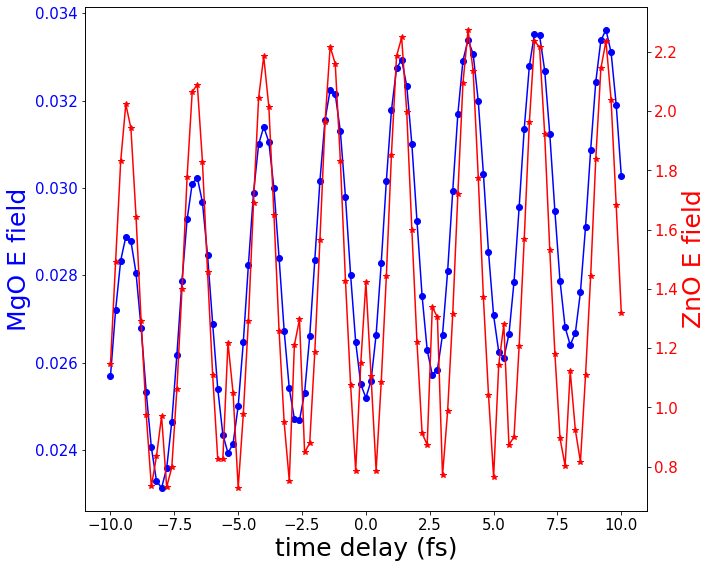

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('MgO E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_MgO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('ZnO E field', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, summed_abs_ZnO, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

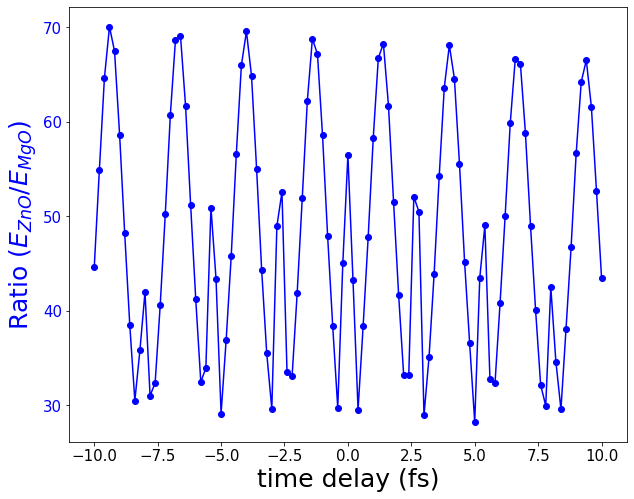

In [28]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Ratio ($E_{ZnO}/ E_{MgO}$)', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_ZnO/summed_abs_MgO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

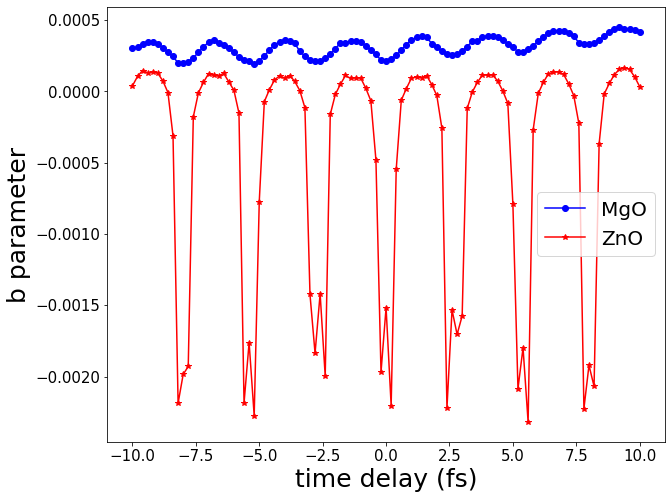

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

# color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('b parameter', color='k', fontsize=25)
ax1.plot(time_delay, MgO_b_param, '-o', color='b')
ax1.plot(time_delay, ZnO_b_param, '-*', color='r')
ax1.tick_params(axis='y', labelcolor='k', labelsize=15)
ax1.legend(['MgO', 'ZnO'], fontsize=20) 

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'r'
# ax2.set_ylabel('ZnO E field', color=color, fontsize=25)  # we already handled the x-label with ax1
# ax2.plot(time_delay, ZnO_b_param, '-*', color=color)
# ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

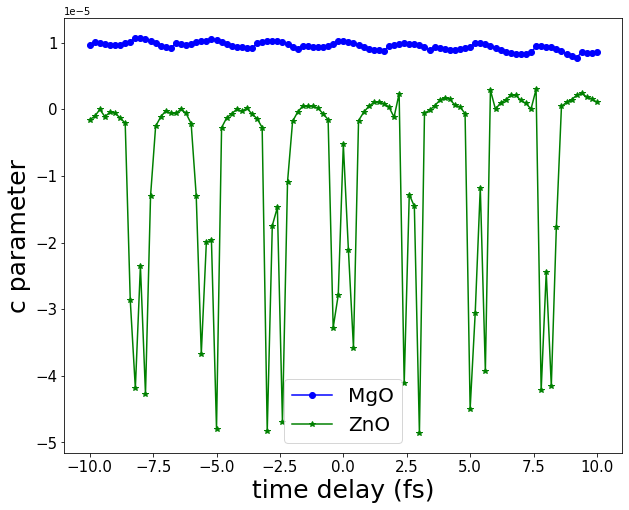

In [27]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

# color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('c parameter', color='k', fontsize=25)
ax1.plot(time_delay, MgO_c_param, '-o', color='b')
ax1.plot(time_delay, ZnO_c_param, '-*', color='g')
ax1.tick_params(axis='y', labelcolor='k', labelsize=15)
ax1.legend(['MgO', 'ZnO'], fontsize=20)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'r'
# ax2.set_ylabel('ZnO E field', color=color, fontsize=25)  # we already handled the x-label with ax1
# ax2.plot(time_delay, ZnO_b_param, '-*', color=color)
# ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

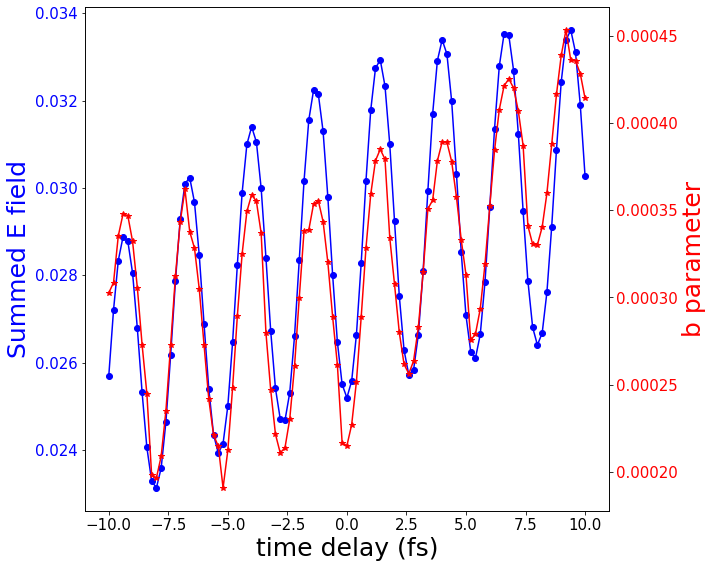

In [5]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_MgO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('b parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, MgO_b_param, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

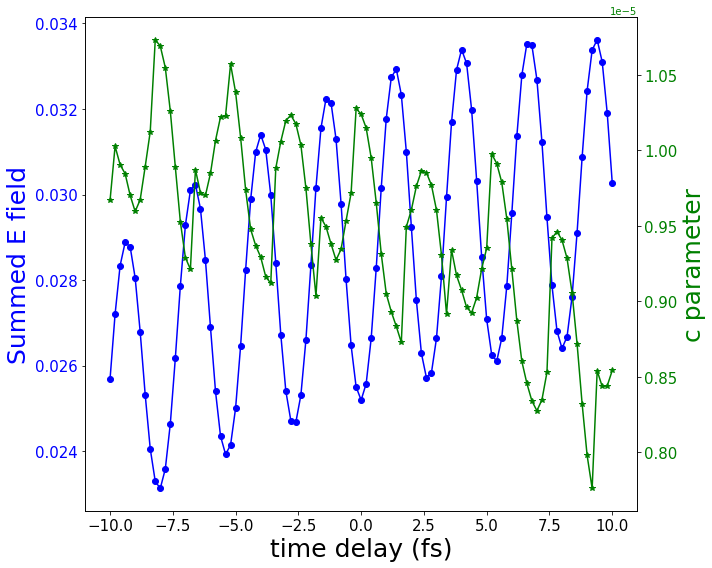

In [7]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_MgO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'g'
ax2.set_ylabel('c parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, MgO_c_param, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

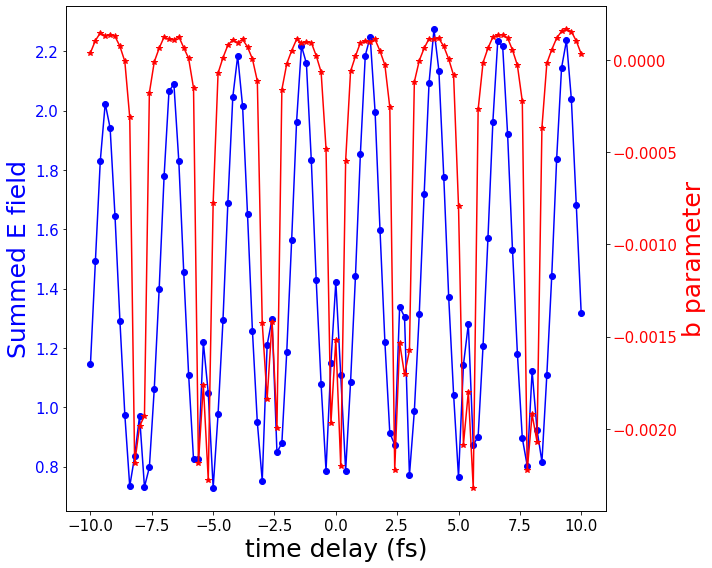

In [8]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_ZnO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('b parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, ZnO_b_param, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

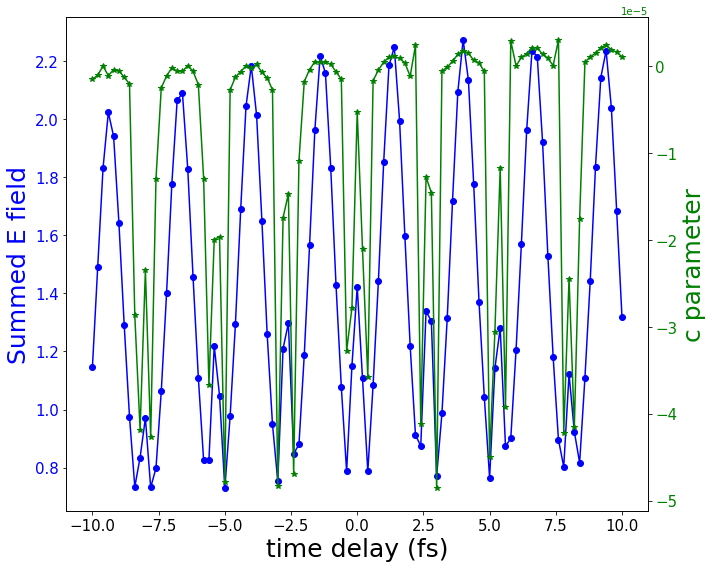

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)

color = 'b'
ax1.set_xlabel('time delay (fs)', fontsize=25)
ax1.tick_params(axis='x', labelsize=15)
time_delay = np.arange(10, -10.2, -0.2)
ax1.set_ylabel('Summed E field', color=color, fontsize=25)
ax1.plot(time_delay, summed_abs_ZnO, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'g'
ax2.set_ylabel('c parameter', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(time_delay, ZnO_c_param, '-*', color=color)
ax2.tick_params(axis='y', labelcolor=color,  labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()